In [11]:
# to delete, moved to requirement.txt
!pip install scikit-learn
!pip install scikit-learn matplotlib
!pip install seaborn



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from data_source import DataSource
from extractor import Extractor
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Extraction des données

In [13]:
source = DataSource("./../data.json")

dataframe_list = source.filter([["WC"], ["Q"], [], [], ["Q"]], "include", None)
extractor = Extractor(dataframe_list)
athletes = extractor.all_athletes()
athletes_data = {}
for athlete in athletes:
    athletes_data[athlete] = extractor.extract_athlete(athlete)


len(athletes_data)

0

# Création d'un DataFrame utilisable pour le clustering

In [14]:
df_athletes = extractor.create_dataframe_clustering(
    athletes_data=athletes_data,
    exceptions=[
        "result",
        "time",
        # "time_points",
        "top_air_judge1",
        "top_air_judge2",
        "top_air_coefficient",
        "top_air_execution",
        "top_air_points",
        "bottom_air_judge1",
        "bottom_air_judge2",
        "bottom_air_coefficient",
        "bottom_air_execution",
        "bottom_air_points",
        # "air_points",
        "ski_judge1",
        "ski_judge2",
        "ski_judge3",
        "ski_judge4",
        "ski_judge5",
        "ski_deduction_judge1",
        "ski_deduction_judge2",
        "ski_deduction_judge3",
        "ski_deduction_judge4",
        "ski_deduction_judge5",
        # "ski_base",
        "ski_deduction_total",
        "ski_points",
        "total_points",
    ],
)
df_athletes

,time_points,air_points,ski_base


# Elbow Method (méthode du coude)
Utilisée pour calculer le meilleur K

In [15]:
inertia = []
K_range = range(1, 12)
for k in K_range:
    model = KMeans(n_clusters=k).fit(df_athletes)
    inertia.append(model.inertia_)

plt.plot(K_range, inertia, marker="o", color="blue")
plt.xlabel("Nombre de clusters")
plt.ylabel("Cour du modele (Inertia)")
plt.title("Courbe méthode du coude")
plt.grid(1)
plt.show()

ValueError: Found array with 0 sample(s) (shape=(0, 3)) while a minimum of 1 is required by KMeans.

# Nettoyage des données (enlever anomalies)

In [ ]:
# clean_model = IsolationForest(contamination=0.01)  # noqa: ERA001
# clean_model.fit(df_athletes)  # noqa: ERA001
# plt.scatter(df_athletes["ski_points"], df_athletes["air_points"], c=clean_model.predict(df_athletes))  # noqa: ERA001


# Clustering sur les données

In [ ]:
model = KMeans(n_clusters=4)
model.fit(df_athletes)
model.predict(df_athletes)
df_athletes["cluster"] = model.fit_predict(df_athletes)
model.cluster_centers_

array([[0.52126159, 0.5142242 , 0.54073538],
       [0.30147328, 0.32948826, 0.31512453],
       [0.75339856, 0.7549936 , 0.73562382],
       [0.11561031, 0.15786312, 0.13517085]])

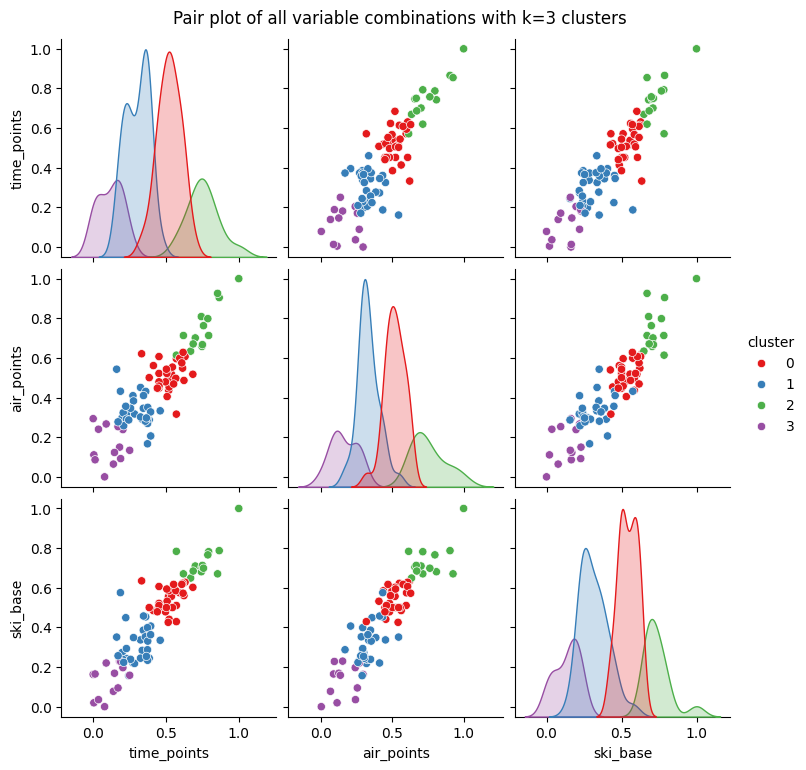

In [ ]:
sns.pairplot(df_athletes, hue="cluster", palette="Set1")

# Afficher le plot
plt.suptitle("Pair plot of all variable combinations with k=3 clusters", y=1.02)  # Titre général
plt.show()

# Réduction de la dimension

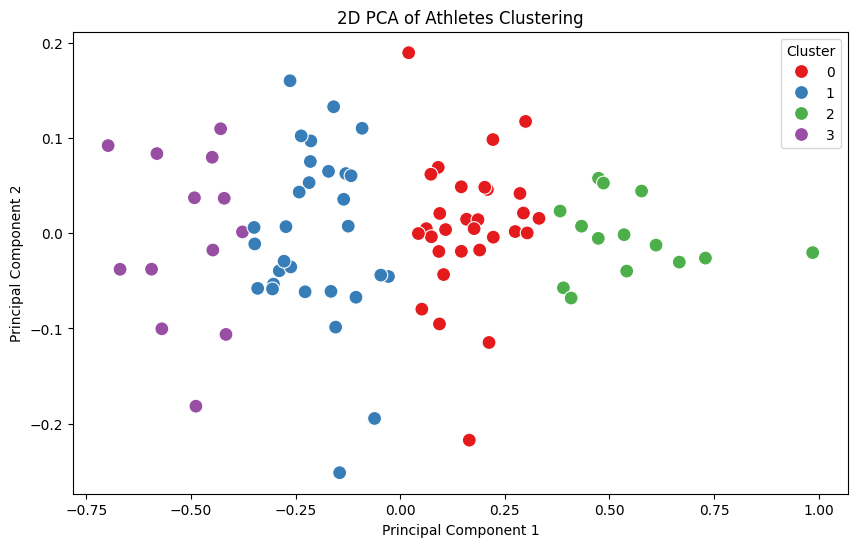

In [ ]:
df_athletes_second = df_athletes.drop("cluster", axis=1)

reduct_model = PCA(n_components=2)
athletes_reduced = reduct_model.fit_transform(df_athletes_second)

df_athletes["PCA1"] = athletes_reduced[:, 0]
df_athletes["PCA2"] = athletes_reduced[:, 1]

# Visualisation des clusters dans le nouvel espace 2D
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_athletes, x="PCA1", y="PCA2", hue="cluster", palette="Set1", s=100)

# Ajout de titres et labels
plt.title("2D PCA of Athletes Clustering")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.show()

In [ ]:
reduct_model.components_

array([[ 0.5990408 ,  0.5543006 ,  0.57784165],
       [ 0.74657758, -0.64750376, -0.1528424 ]])